# Solving problems by Searching

## Question 1:

1. Explore search.py. <br>

2. Implement and compare the following algorithms for the map given below by showing which path the algorithm takes and its cost:
    - Breadth-First Search
    - Depth-First Search
    - Iterartive Deepening Search
    - Greedy Best-First Search

3. Find which algorithm works the best.

Hint: Look at search.ipynb to know how the input parameters work for the algorithms.

<b>Start</b> city should be <b>Zerind</b> and the <b>destination</b> should be <b>Hirsova</b>

In [1]:
from search import *
from notebook import *

In [2]:
romania_map = UndirectedGraph(dict(
    Arad=dict(Zerind=90, Sibiu=160, Timisoara=130),
    Bucharest=dict(Urziceni=95, Pitesti=110, Giurgiu=100, Fagaras=230),
    Craiova=dict(Drobeta=135, Rimnicu=155, Pitesti=150),
    Drobeta=dict(Mehadia=85),
    Eforie=dict(Hirsova=95),
    Fagaras=dict(Sibiu=110),
    Hirsova=dict(Urziceni=105),
    Iasi=dict(Vaslui=100, Neamt=95),
    Lugoj=dict(Timisoara=120, Mehadia=80),
    Oradea=dict(Zerind=80, Sibiu=165),
    Pitesti=dict(Rimnicu=105),
    Rimnicu=dict(Sibiu=90),
    Urziceni=dict(Vaslui=155)
))

romania_map.locations = dict(
    Arad=(100, 500), Bucharest=(420, 340), Craiova=(270, 300),
    Drobeta=(180, 310), Eforie=(580, 300), Fagaras=(320, 460),
    Giurgiu=(390, 280), Hirsova=(550, 360), Iasi=(490, 520),
    Lugoj=(180, 390), Mehadia=(185, 350), Neamt=(425, 550),
    Oradea=(150, 585), Pitesti=(335, 380), Rimnicu=(250, 425),
    Sibiu=(225, 470), Timisoara=(110, 425), Urziceni=(475, 365),
    Vaslui=(525, 460), Zerind=(125, 545)
)

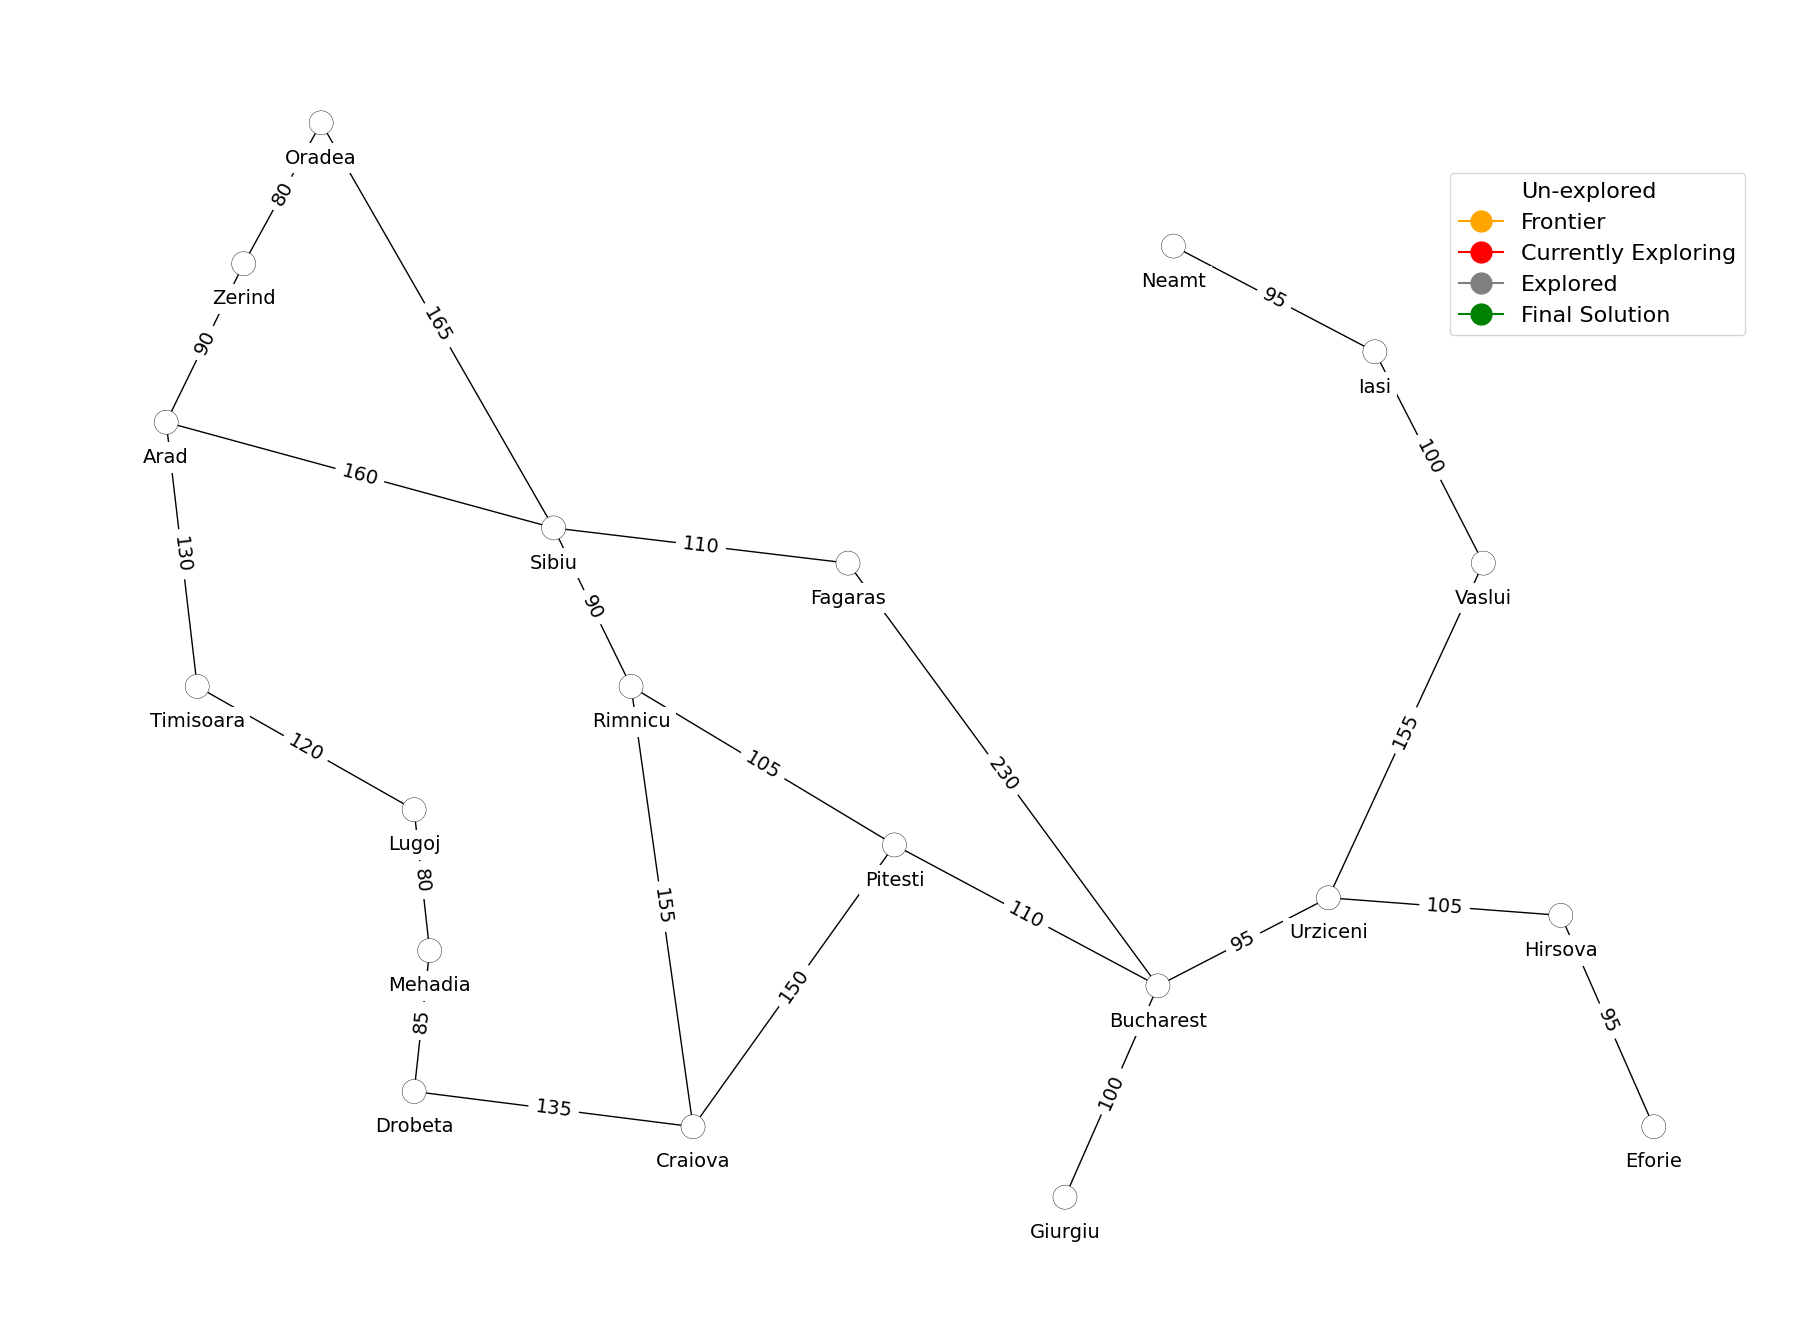

In [3]:
# node colors, node positions and node label positions
node_colors = {node: 'white' for node in romania_map.locations.keys()}
node_positions = romania_map.locations
node_label_pos = { k:[v[0],v[1]-10]  for k,v in romania_map.locations.items() }
edge_weights = {(k, k2) : v2 for k, v in romania_map.graph_dict.items() for k2, v2 in v.items()}

romania_graph_data = {  'graph_dict' : romania_map.graph_dict,
                        'node_colors': node_colors,
                        'node_positions': node_positions,
                        'node_label_positions': node_label_pos,
                         'edge_weights': edge_weights
                     }


show_map(romania_graph_data)

### Breadth-First Search

In [ ]:
# Implement your code here

### Depth-First Search

In [ ]:
# Implement your code here

### Iterartive Deepening Search

In [ ]:
# Implement your code here

### Greedy Best-First Search

In [ ]:
# Implement your code here

### Comparison Report

Insert yout comparison report here.

## Question 2:

### 8 Puzzle Problem

![](https://ece.uwaterloo.ca/~dwharder/aads/Algorithms/N_puzzles/images/puz3.png)

A sliding tile puzzle where you can swap the blank with an adjacent piece, trying to reach a goal configuration. The cells are numbered 0 to 8, starting at the top left and going row by row left to right. The pieces are numebred 1 to 8, with 0 representing the blank. An action is the cell index number that is to be swapped with the blank (*not* the actual number to be swapped but the index into the state). So the diagram above left is the state `(5, 2, 7, 8, 4, 0, 1, 3, 6)`, and the action is `8`, because the cell number 8 (the 9th or last cell, the `6` in the bottom right) is swapped with the blank.

There are two disjoint sets of states that cannot be reached from each other. One set has an even number of "inversions"; the other has an odd number. An inversion is when a piece in the state is larger than a piece that follows it.

We will solve this problem using A*.

1. Look at `astar_search` function in search.py
2. Ideate and implement any two heuristics for the 8 puzzle.
3. Compare the two heuristics you have picked.

An example heuristic is given for your reference:
No. of Misplaced Tiles:- The heuristic calculates the number of misplaced tiles between the current state and goal state.

Note: Add a Markdown block explaining your heuristics as well.

In [6]:
import math

In [19]:
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.

In [21]:
def path_states(node):
    "The sequence of states to get to this node."
    if node in (cutoff, failure, None): 
        return []
    return path_states(node.parent) + [node.state]

In [ ]:
class EightPuzzle(Problem):
    """ The problem of sliding tiles numbered from 1 to 8 on a 3x3 board,
    where one of the squares is a blank, trying to reach a goal configuration.
    A board state is represented as a tuple of length 9, where the element at index i 
    represents the tile number at index i, or 0 if for the empty square, e.g. the goal:
        1 2 3
        4 5 6 ==> (1, 2, 3, 4, 5, 6, 7, 8, 0)
        7 8 _
    """

    def __init__(self, initial, goal=(0, 1, 2, 3, 4, 5, 6, 7, 8)):
        assert inversions(initial) % 2 == inversions(goal) % 2 # Parity check
        self.initial, self.goal = initial, goal
    
    def actions(self, state):
        """The indexes of the squares that the blank can move to."""
        moves = ((1, 3),    (0, 2, 4),    (1, 5),
                 (0, 4, 6), (1, 3, 5, 7), (2, 4, 8),
                 (3, 7),    (4, 6, 8),    (7, 5))
        blank = state.index(0)
        return moves[blank]
    
    def result(self, state, action):
        """Swap the blank with the square numbered `action`."""
        s = list(state)
        blank = state.index(0)
        s[action], s[blank] = s[blank], s[action]
        return tuple(s)
    
    def h1(self, node):
        """The misplaced tiles heuristic."""
        return hamming_distance(node.state, self.goal)
    
    
    
def hamming_distance(A, B):
    "Number of positions where vectors A and B are different."
    return sum(a != b for a, b in zip(A, B))
    

def inversions(board):
    "The number of times a piece is a smaller number than a following piece."
    return sum((a > b and a != 0 and b != 0) for (a, b) in combinations(board, 2))
    
    
def board8(board, fmt=(3 * '{} {} {}\n')):
    "A string representing an 8-puzzle board"
    return fmt.format(*board).replace('0', '_')

class Board(defaultdict):
    empty = '.'
    off = '#'
    def __init__(self, board=None, width=8, height=8, to_move=None, **kwds):
        if board is not None:
            self.update(board)
            self.width, self.height = (board.width, board.height) 
        else:
            self.width, self.height = (width, height)
        self.to_move = to_move

    def __missing__(self, key):
        x, y = key
        if x < 0 or x >= self.width or y < 0 or y >= self.height:
            return self.off
        else:
            return self.empty
        
    def __repr__(self):
        def row(y): return ' '.join(self[x, y] for x in range(self.width))
        return '\n'.join(row(y) for y in range(self.height))
            
    def __hash__(self): 
        return hash(tuple(sorted(self.items()))) + hash(self.to_move)

In [28]:
puzzle = EightPuzzle((2, 4, 3, 1, 5, 6, 7, 8, 0))

In [31]:
for s in path_states(astar_search(puzzle, puzzle.h1)):
    print(board8(s))

2 4 3
1 5 6
7 8 _

2 4 3
1 5 _
7 8 6

2 4 _
1 5 3
7 8 6

2 _ 4
1 5 3
7 8 6

2 5 4
1 _ 3
7 8 6

2 5 4
1 3 _
7 8 6

2 5 4
1 3 6
7 8 _

2 5 4
1 3 6
7 _ 8

2 5 4
1 _ 6
7 3 8

2 5 4
1 6 _
7 3 8

2 5 _
1 6 4
7 3 8

2 _ 5
1 6 4
7 3 8

_ 2 5
1 6 4
7 3 8

1 2 5
_ 6 4
7 3 8

1 2 5
6 _ 4
7 3 8

1 2 5
6 3 4
7 _ 8

1 2 5
6 3 4
_ 7 8

1 2 5
_ 3 4
6 7 8

1 2 5
3 _ 4
6 7 8

1 2 5
3 4 _
6 7 8

1 2 _
3 4 5
6 7 8

1 _ 2
3 4 5
6 7 8

_ 1 2
3 4 5
6 7 8



In [32]:
%%timeit
astar_search(puzzle, puzzle.h1)

2.88 s ± 84.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Heuristic 1

Explain heuristic 1 here.

In [ ]:
def heuristic1(node):
    """Implement the code for the heuristic 1 here."""

In [ ]:
# Test heuristic 1
for s in path_states(astar_search(puzzle, heuristic1)):
    print(board8(s))

In [ ]:
%%timeit
astar_search(puzzle, heuristic1)

### Heuristic 2

Explain heuristic 2 here.

In [ ]:
def heuristic2(node):
    """Implement the code for the heuristic 2 here."""

In [ ]:
# Test heuristic 2
for s in path_states(astar_search(puzzle, heuristic2)):
    print(board8(s))

In [ ]:
%%timeit
astar_search(puzzle, heuristic2)

### Comparison Report

Provide detailed comparison here.